In [1]:
from util import load_data, fdr, plot_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from collections import ChainMap
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, y_train, y_test = load_data('var_30.csv')
x_train.head()

,ssn_name_dob_count_7,ssn_dob_count_0_by_14,name_dob_count_0_by_14,ssn_firstname_count_0_by_14,name_count_7,fulladdress_homephone_count_0_by_14,name_day_since,homephone_count_7,homephone_count_3,address_count_1_by_7,...,fulladdress_homephone_count_7,ssn_firstname_count_7,ssn_lastname_count_0_by_14,ssn_lastname_day_since,ssn_name_count_7,name_count_14,ssn_count_7,ssn_dob_count_7,ssn_lastname_count_7,ssn_name_day_since
75789,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-1.091944,1.703825,0.639149,0.103441,...,-0.057263,-0.057185,0.123458,-1.301966,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-1.302483
418860,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.099167,0.055132,0.639149,0.103441,...,-0.057263,-0.057185,0.123458,-0.103799,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.104324
636106,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.845975,0.055132,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,0.647433,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,0.646903
428729,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.052085,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-0.255947,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.256471
395178,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.014088,1.703825,2.960354,0.103441,...,-0.057263,-0.057185,0.123458,-0.189382,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.189907


In [3]:
dt = DecisionTreeClassifier()
params = {'min_samples_leaf': [128, 256, 512, 1024],
          'max_depth' : [10, 20, 30, 40],
          'ccp_alpha': [0, 1e-8, 1e-7, 2e-7, 5e-7]}
grid = GridSearchCV(dt, params, cv=10, refit='FDR', 
                    verbose=1, n_jobs=4,
                    scoring={'FDR': fdr})
grid.fit(x_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed: 14.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'ccp_alpha': [0, 1e-08, 1e-07, 2e-07, 5e-07],
         

In [15]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")

The best parameters are {'ccp_alpha': 0, 'max_depth': 10, 'min_samples_leaf': 256} with a score of 0.53077


In [5]:
pd.DataFrame(grid.cv_results_).filter(
    items=['param_max_depth', 'param_min_samples_leaf',
           'param_ccp_alpha', 'mean_test_FDR', 
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_max_depth,param_min_samples_leaf,param_ccp_alpha,mean_test_FDR,std_test_FDR,rank_test_FDR
0,10,128,0,0.530423,0.015918,7
1,10,256,0,0.530772,0.015899,1
2,10,512,0,0.527111,0.016758,61
3,10,1024,0,0.528418,0.015922,26
4,20,128,0,0.525890,0.015721,69
...,...,...,...,...,...,...
75,30,1024,5e-07,0.527111,0.016665,58
76,40,128,5e-07,0.529552,0.016882,11
77,40,256,5e-07,0.529465,0.016796,14
78,40,512,5e-07,0.527460,0.016535,54


In [6]:
dt = DecisionTreeClassifier(**grid.best_params_)
params = {'class_weight': ['balanced', None],
          'criterion': ['gini', 'entropy']}
grid_2 = GridSearchCV(dt, params, cv=10, refit='FDR', 
                      verbose=1, n_jobs=4,
                      scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid_2.fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   32.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=256,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'class_weight': ['balanced', None],
                     

In [7]:
print(f"The best parameters are {grid_2.best_params_} "
      f"with a score of {grid_2.best_score_:0.5f}")

The best parameters are {'class_weight': None, 'criterion': 'gini'} with a score of 0.53077


In [8]:
pd.DataFrame(grid_2.cv_results_).filter(
    items=['param_class_weight', 'param_criterion',
           'mean_test_FDR', 'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_class_weight,param_criterion,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,balanced,gini,0.529029,0.016948,3,0.772962,0.010400
1,balanced,entropy,0.528505,0.016817,4,0.772446,0.009449
2,None,gini,0.530772,0.015899,1,0.753544,0.008424
3,None,entropy,0.529726,0.016205,2,0.767556,0.008990


In [9]:
param = ChainMap(grid_2.best_params_, grid.best_params_)

FDR: 0.5107839780896953

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197079
           1       0.85      0.39      0.53      2921

    accuracy                           0.99    200000
   macro avg       0.92      0.69      0.76    200000
weighted avg       0.99      0.99      0.99    200000



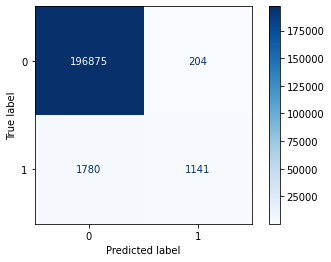

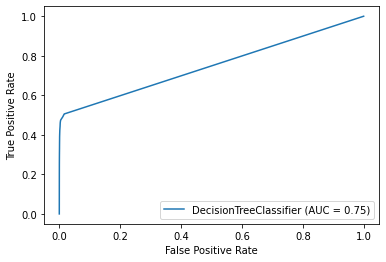

In [10]:
dt = DecisionTreeClassifier(**param).fit(x_train, y_train)
plot_report(dt, x_test, y_test)

In [7]:
ccp_alphas = [0, 1e-8, 5e-8, 1e-7, 1.5e-7, 2e-7, 3e-7, 4e-7, 5e-7, 1e-6, 5e-6]
clfs = []
for ccp_alpha in ccp_alphas:
    print(ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, 
                                 ccp_alpha=ccp_alpha, 
                                 min_samples_leaf=256,
                                 criterion= 'gini',
                                 max_depth=50)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

0
1e-08
5e-08
1e-07
1.5e-07
2e-07
3e-07
4e-07
5e-07
1e-06
5e-06
Number of nodes in the last tree is: 43 with ccp_alpha: 5e-06


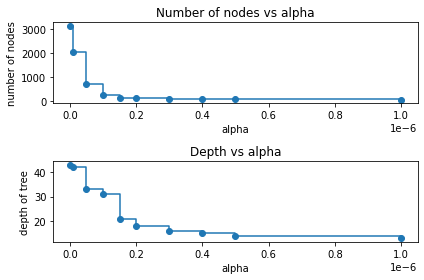

In [8]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

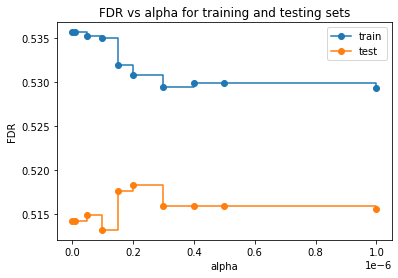

In [9]:
train_scores = [fdr(clf, x_train, y_train) for clf in clfs]
test_scores = [fdr(clf, x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("FDR")
ax.set_title("FDR vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()